In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [13]:
y_train[1][0]

9

In [14]:
classes=["airplane","automobile","bird","cat","deer","dog"]

In [16]:
classes[y_train[3][0]]

'deer'

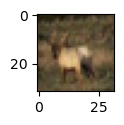

In [18]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[3])

In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [21]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
 y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
               loss='categorical_crossentropy', # as we are using one hot encoded y train (not discrete y train values in which case we use sparse_cat_cr_en)                                                                                                                                            ` 
            metrics= ['accuracy'])
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8078 - accuracy: 0.3547
Epoch 2/50
1563/1563 [==============================] - 107s 69ms/step - loss: 1.6212 - accuracy: 0.4306
Epoch 3/50
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5393 - accuracy: 0.4582
Epoch 4/50
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4814 - accuracy: 0.4789
Epoch 5/50
1563/1563 [==============================] - 104s 66ms/step - loss: 1.4334 - accuracy: 0.4957
Epoch 6/50
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3887 - accuracy: 0.5118
Epoch 7/50
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3518 - accuracy: 0.5247
Epoch 8/50
1563/1563 [==============================] - 96s 61ms/step - loss: 1.3188 - accuracy: 0.5343
Epoch 9/50
1563/1563 [==============================] - 90s 58ms/step - loss: 1.2852 - accuracy: 0.5499
Epoch 10/50
1563/1563 [==============================] - 91

In [32]:
classes[np.argmax(model.predict(X_test_scaled)[6])]

'automobile'

In [33]:
classes[y_test[6][0]]

'automobile'

In [34]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 7s 23ms/step - loss: 1.5850 - accuracy: 0.5598


[1.584969162940979, 0.5598000288009644]